In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

In [2]:
# read data into a DataFrame
data = pd.read_csv('vif_new_try.csv', index_col=0)
data.head()

# Remove all rows contain NA values 
data.dropna(inplace=True)

# Write the updated DataFrame to a new CSV file
data.to_csv('new_file_aftervif.csv', index=False)


In [3]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
df = pd.read_csv('new_file_aftervif.csv', index_col=0)
data_standardised = df.copy()
for c in data.columns.values:
    data_standardised[c] = mms.fit_transform(data[c].values.reshape(-1,1))
data_standardised.head()

,health_ins,poverty,SNAP,no_comp,no_internet,home_broad,broad_num,broad_avail,broad_cost,population_bbn,...,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,Diversity.Index,Mean,unemp
unemp,,,,,,,,,,,,,,,,,,,,,
3.8,0.251337,0.566964,0.655502,0.373134,0.496423,0.497135,0.214286,0.991984,0.181815,0.002494,...,0.462462,0.001811,0.743363,0.312644,0.194946,0.049180,0.432056,0.739232,0.123758,0.160000
3.5,0.203209,0.337054,0.428230,0.230514,0.320458,0.677650,0.071429,0.864729,0.181815,0.011676,...,0.504505,0.009826,0.757522,0.331034,0.144404,0.016393,0.351916,0.545965,0.180668,0.140000
2.9,0.240642,0.292411,0.351675,0.378109,0.412017,0.584527,0.000000,0.929860,1.000000,0.003482,...,0.468468,0.002987,0.927434,0.144828,0.093863,0.000000,0.222997,0.683137,0.257151,0.100000
2.9,0.173797,0.256696,0.380383,0.306799,0.383405,0.614613,0.071429,0.254509,0.590907,0.002539,...,0.555556,0.002020,0.755752,0.266667,0.252708,0.000000,0.184669,0.169109,0.260163,0.100000
2.7,0.331551,0.337054,0.435407,0.341625,0.479256,0.517192,0.071429,0.994990,0.181815,0.003254,...,0.735736,0.003642,0.867257,0.195402,0.122744,0.065574,0.233449,0.420628,0.000000,0.086667


<AxesSubplot:xlabel='Unemployment', ylabel='no_internet'>

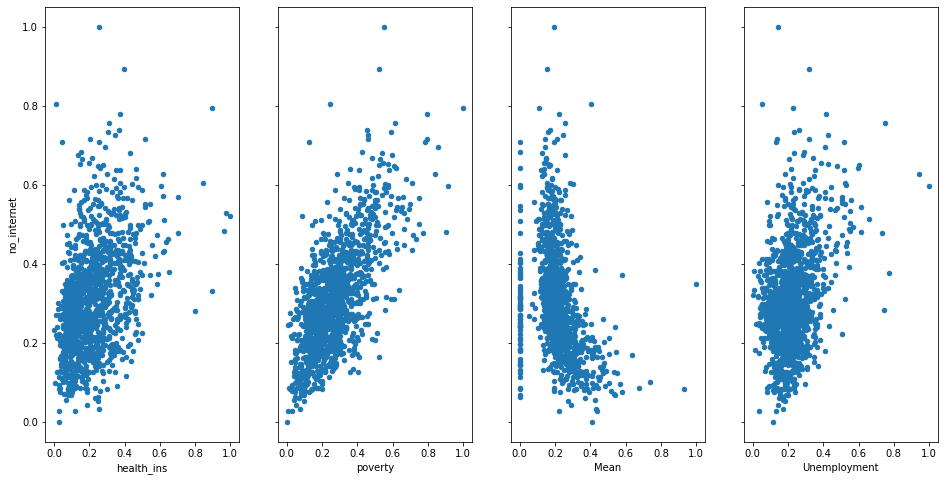

In [4]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 4, sharey=True)
data_standardised.plot(kind='scatter', x='health_ins', y='no_internet', ax=axs[0], figsize=(16, 8))
data_standardised.plot(kind='scatter', x='poverty', y='no_internet', ax=axs[1])
data_standardised.plot(kind='scatter', x='Mean', y='no_internet', ax=axs[2])
data_standardised.plot(kind='scatter', x='Unemployment', y='no_internet', ax=axs[3])

In [6]:
Simple Linear Regression

SyntaxError: invalid syntax (3100749269.py, line 1)

In [9]:
# use Statsmodels to estimate the model coefficients 
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='no_internet ~ health_ins', data=data).fit()

# print the coefficients
lm.params

Intercept     18.318725
health_ins     0.759315
dtype: float64

In [10]:

# manually calculate the prediction
18.803852 + 0.750771*10000
     

7526.513852

In [11]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'health_ins': [data_standardised.health_ins.min(), data_standardised.health_ins.max()]})
X_new.head()
     

,health_ins
0,0.0
1,1.0


In [12]:
# make predictions for those x values and store them
preds = lm.predict(X_new)
preds
     

0    18.318725
1    19.078040
dtype: float64

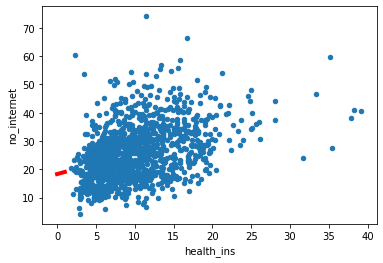

In [14]:

# first, plot the observed data
data.plot(kind='scatter', x='health_ins', y='no_internet')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=4)

In [35]:

# print the p-values for the model coefficients
lm.pvalues

Intercept     2.241871e-194
health_ins     1.820555e-54
dtype: float64

In [36]:

# print the R-squared value for the model
lm.rsquared

0.16773571794595676

In [37]:

# create a fitted model with all three features
lm = smf.ols(formula='no_internet ~ health_ins + poverty + Mean+Unemployment', data=data).fit()

# print the coefficients
lm.params

Intercept       15.689941
health_ins       0.247892
poverty          0.895780
Mean            -0.006589
Unemployment    -0.239657
dtype: float64

In [38]:

# print a summary of the fitted model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            no_internet   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     373.8
Date:                Sun, 15 Jan 2023   Prob (F-statistic):          6.24e-215
Time:                        01:56:17   Log-Likelihood:                -4299.0
No. Observations:                1318   AIC:                             8608.
Df Residuals:                    1313   BIC:                             8634.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       15.6899      0.691     22.708      0.000      14.334      17.045
health_ins       0.2479      0.039      6.292      0.000       0.171       0.325
poverty          0.8958      0.041     21.840      0.000       0.815       0.976
Mean            -0.0066      0.001    -11.606      0.000      -0.008      -0.005
Unemployment    -0.2397      0.078     -3.062      0.002      -0.393      -0.086
==============================================================================
Omnibus:                      194.529   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              624.568
Skew:                           0.726   Prob(JB):                    2.38e-136
Kurtosis:                       6.044   Cond. No.                     3.08e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
#Linear Regression in scikit-learn
# create X and y
feature_cols = ['health_ins', 'poverty','Unemployment']
X = data_standardised[feature_cols]
y = data_standardised.no_internet

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

0.14314670505499424
[ 0.12040964  0.65958019 -0.1630213 ]


In [44]:
# pair the feature names with the coefficients
zip(feature_cols, lm.coef_)

In [50]:
# predict for a new observation
lm.predict('health_ins', 'poverty', 'Unemployment')
      

TypeError: LinearModel.predict() takes 2 positional arguments but 4 were given

In [51]:
lm.score(X, y)
     

0.48447247696122386

ValueError: The number of FixedLocator locations (55), usually from a call to set_ticks, does not match the number of ticklabels (20).

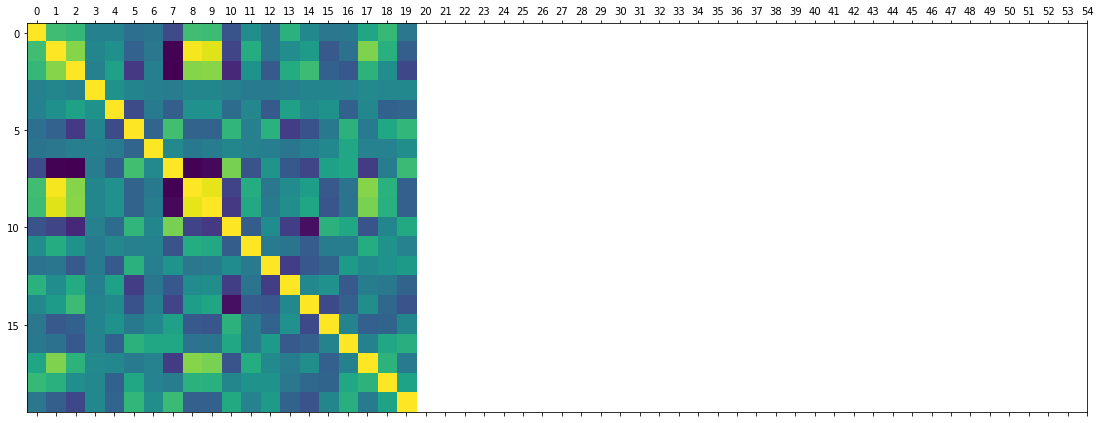

In [53]:
#df = bike_rental_final
df1 = pd.read_csv('new_file_few.csv', index_col=0)
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(df1.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df1.columns, fontsize=14, rotation=90)
plt.yticks(range(df.shape[1]), df1.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

Text(0.5, 1.0, 'Correlation Matrix')

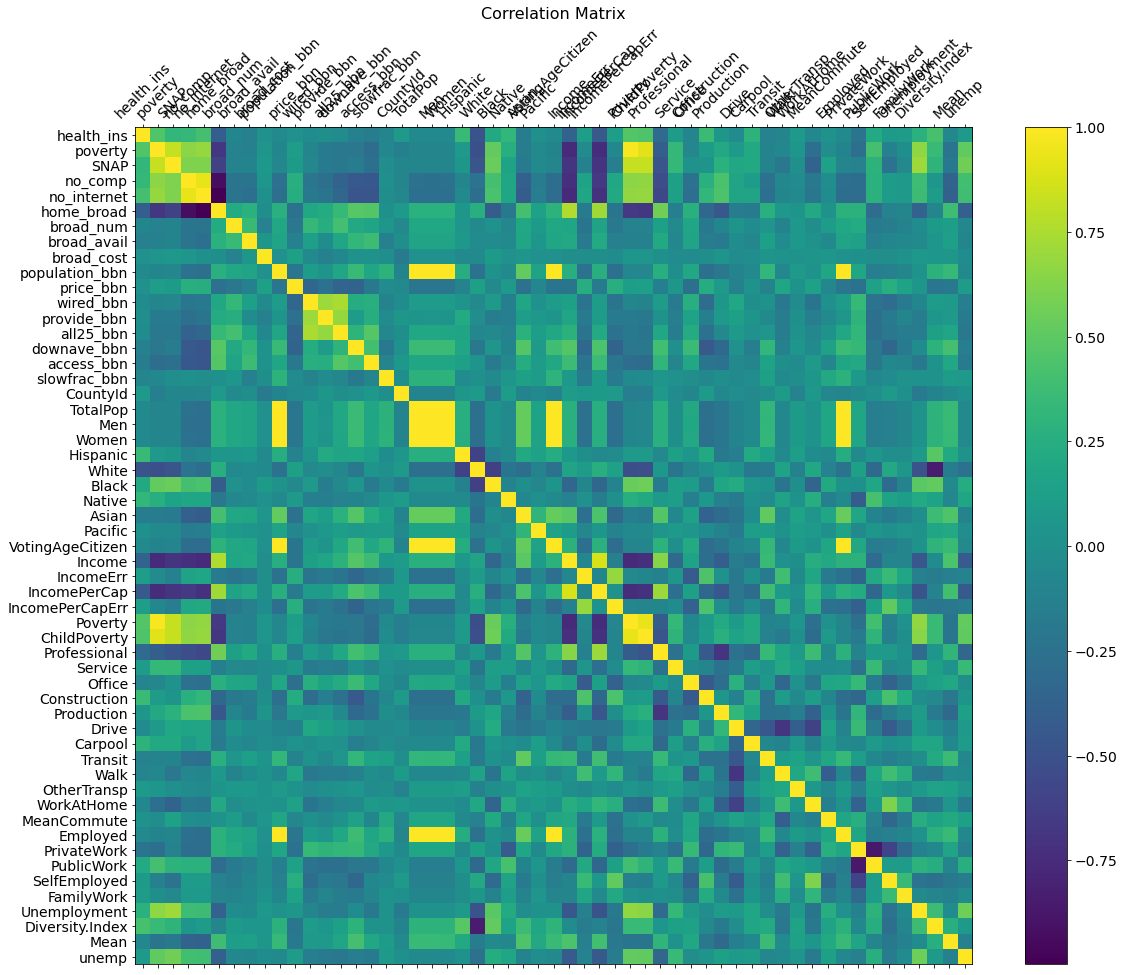

In [18]:
# You can also plot the correlation matrix
# only for numeric variables
# reference: https://stackoverflow.com/a/29432741/4667568
f = plt.figure(figsize=(19, 15)) # creates a new figure, sets length and width
plt.matshow(data_standardised.corr(), fignum=f.number) # matshow - creates matrix plot for df_office.corr(), fignum - assigned number for when there is multiple figures plotted
plt.xticks(range(data_standardised.select_dtypes(['number']).shape[1]), data_standardised.select_dtypes(['number']).columns, fontsize=14, rotation=45) # add the x axis label
plt.yticks(range(data_standardised.select_dtypes(['number']).shape[1]), data_standardised.select_dtypes(['number']).columns, fontsize=14) # add the y axis label
# select_dtypes(['number']) - choose the numeric variables
cb = plt.colorbar() # add a legend to the right hand (default position)
cb.ax.tick_params(labelsize=14) # label size
plt.title('Correlation Matrix', fontsize=16) # add the title

In [7]:
def vif(data_standardised, col_i):
cols = list(data_standardised.columns)
cols.remove(col_i)
cols_noti = cols
formula = col_i + '~' + '+'.join(cols_noti)
r2 = ols(formula, data_standardised).fit().rsquared 
# 其实就是多元线性回归建模步骤，只是取出了参数 R 平方而已
return 1. / (1. - r2)



IndentationError: expected an indented block after function definition on line 1 (2938790257.py, line 2)

In [4]:
data_standardised = sm.OLS(endog=bike_rental_final[['cnt']], exog=sm.add_constant(df_predictors_selected_VIF)).fit()
data_standardised.summary()
# plot 

plt.scatter(data_standardised.fittedvalues, data_standardised.resid)
# adding title and labels
plt.xlabel('Fitted bike rental')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of bike rental')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'fittedvalues'

In [7]:
# calculating VIF
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(data_standardised, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data. add_constant is a function from statsmodels (see the import above)
        df_with_const = add_constant(data_standardised)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            data_standardised_new = data_standardised.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return data_standardised_new

In [9]:
data_standardised_new_new = drop_column_using_vif_(data_standardised.drop('cnt', axis=1))

KeyError: "['cnt'] not found in axis"